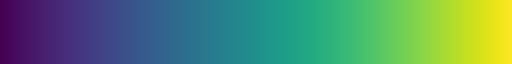

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries for regression
import statsmodels.formula.api as smf

# Set style for seaborn plots
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)

The data for this lab come from [Kaggle](https://www.kaggle.com/shivam2503/diamonds) and describe the prices and other attributes of almost 54,000 diamonds.

Let's start by loading and examining the data.

In [2]:
diamonds = pd.read_csv('diamonds.csv').drop(columns = ['serial_number', 'x', 'y', 'z'])
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326


Diamonds are weighed in carats, and are graded on three other C's:  cut, color, and clarity.  

* The *carat* is a unit of mass.  Today, 1 carat is 200 mg, though historically other definitions have been used.

* The quality of the *cut* is graded by an expert on the scale Fair, Good, Very Good, Premium, Ideal.

* The *color* is graded from J (worst) to D (best).  A D-graded diamond is completely colorless.

* The *clarity* is a measure of how clear and free of blemishes the diamond is, on the scale I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, to IF (best).

* The *depth* and *table* describe the shape of the diamond, and are a measure of its height and width.

## Simple Linear Regression

Run the following cell, which makes some of our usual simple linear regression functions available.

In [3]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(df, x, y):
    """The correlation between x and y in DataFrame df."""
    return np.mean(standard_units(df[x]) * standard_units(df[y]))

def slope(df, x, y):
    """The slope of the regression line in DataFrame df for variables x and y."""
    r = correlation(df, x, y)
    return r * np.std(df[y]) / np.std(df[x])

def intercept(df, x, y):
    """The intercept of the regression line in DataFrame df for variables x and y."""    
    return np.mean(df[y]) - slope(df, x, y) * np.mean(df[x])

def predict(df, x, y, new_x):
    return slope(df, x, y) * new_x + intercept(df, x, y)

def rmse(df, x, y):
    """The RMSE of predicting y based on x with linear regression."""
    r = correlation(df, x, y)
    return np.std(df[y]) * np.sqrt(1 - r**2)

**Question 1.** 

There are three quantitative attributes in the data set that we could attempt to use to predict price.  So, draw three scatter plots: (i) price vs. carat, (ii) price vs. depth, and (iii) price vs. table.  Also compute the correlation of each pair.  One of the three attributes appears to be by far the best candidate for simple linear regression of price.  Which one is it?  Assign `best_attribute` to either `'carat'`, `'depth'`, or `'table'` to give your answer.

0.921591301193476

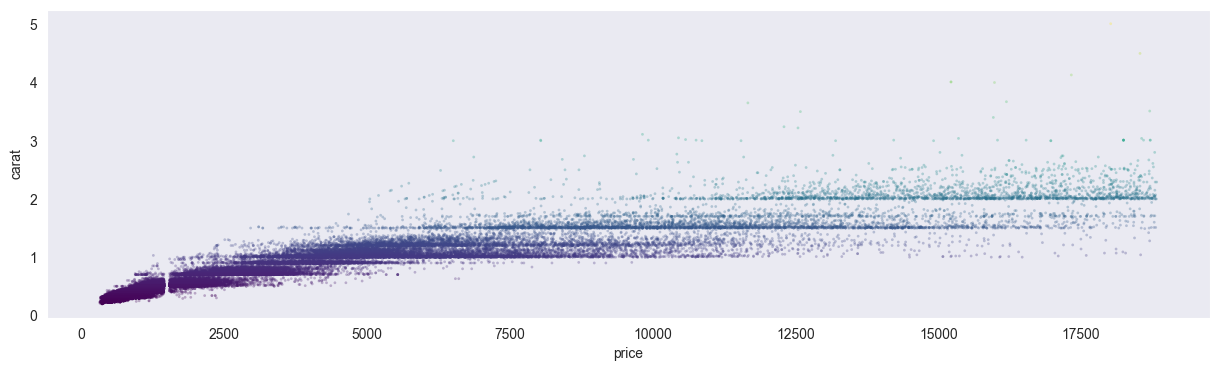

In [4]:
plt.figure(figsize = (15, 4))
sns.scatterplot(data = diamonds,
                x = 'price',
                y = 'carat',
                linewidth = 0,
                alpha = 0.3,
                s = 4,
                hue = 'carat',
                palette = 'viridis',
                legend = False)
diamonds['price'].corr(diamonds['carat'])

-0.010647404584142985

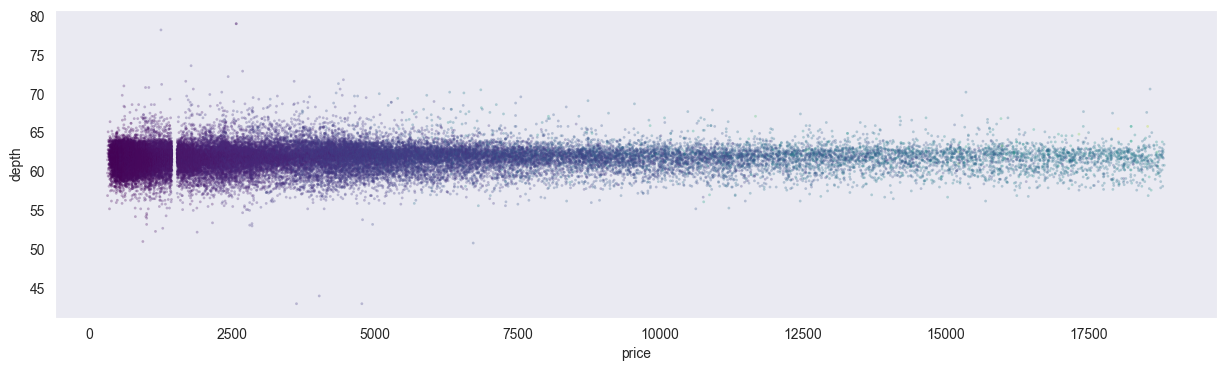

In [5]:
plt.figure(figsize = (15, 4))
sns.scatterplot(data = diamonds,
                x = 'price',
                y = 'depth',
                linewidth = 0,
                alpha = 0.3,
                s = 4,
                hue = 'carat',
                palette = 'viridis',
                legend = False)
diamonds['price'].corr(diamonds['depth'])

0.12713390212174205

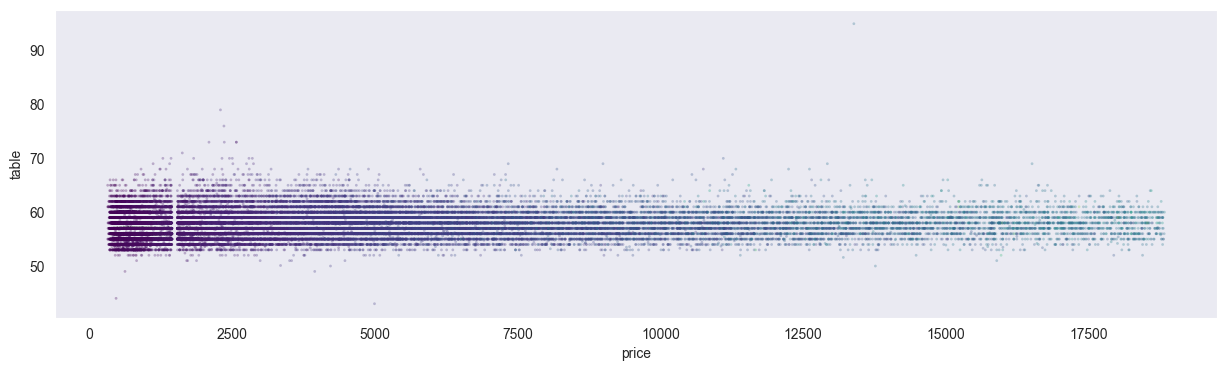

In [6]:
plt.figure(figsize = (15, 4))
sns.scatterplot(data = diamonds,
                x = 'price',
                y = 'table',
                linewidth = 0,
                alpha = 0.3,
                s = 4,
                hue = 'carat',
                palette = 'viridis',
                legend = False)
diamonds['price'].corr(diamonds['table'])

best_attribute = carat

Run the following cell to compute the RMSE for the regression predictions based on the attribute you chose:

In [7]:
rmse_value = rmse(diamonds, 'carat', 'price')
print('RMSE for price and carat:', rmse_value)

RMSE for price and carat: 1548.5331930613172


You should get an answer that is close to \$1549.  Compared to the price of many of the diamonds in the data set, that's not too big of an error.

## Multiple Linear Regression

Now let's try using multiple linear regression on all three quantitative attributes, hoping that we can reduce the RMSE of the predictions.

Doing this for all 54,000 diamonds in the data set would be computationally prohibitive for the amount of time we have in recitation.  So let's look at just a random sample of 1000 diamonds from the table.

**Question 2.**

Assign `diamonds_1000` to a random sample of 1000 diamonds from the `diamonds` table.  Then assign `diamonds_mlr` to be the same as `diamonds_1000`, except that `diamonds_mlr` contains only the columns we will use for our multiple linear regression (MLR), and make sure the columns are in the same order as the original table.

*Hint:* there are three attributes and one response variable that should be in `diamonds_mlr`.

In [8]:
diamonds_1000 = diamonds.sample(n=1000, random_state = 404)  # You can use any random_state value for reproducibility
diamonds_mlr = diamonds_1000[['carat', 'depth', 'table', 'price']]
diamonds_mlr.head(1)

,carat,depth,table,price
46048,0.5,61.0,56.0,1731


**Question 3.**

Let's use multiple linear regression (MLR) to predict the price of just the first diamond in `diamonds_mlr`.  Assign `my_weights` to an array of any weights of your choice.  Assign `first_row_attributes` to an array containing just the attributes of that first diamond.  And assign `first_row_prediction` to the predicted price, given your weights and the diamond's attributes.

Then, **adjust the weights you have chosen**, such that your prediction error for that first diamond is no more than \$100.

Recall that the prediction equation for MLR is as follows:

$$ y = a_1 \cdot x_1 + a_2 \cdot x_2 + \ldots + a_n \cdot x_n + b $$

In [9]:
my_weights = [1, 1, 1]
first_row_attributes = diamonds_mlr.iloc[0][['carat', 'depth', 'table']].values
first_row_prediction = predict(diamonds_mlr, 'carat', 'price', np.dot(first_row_attributes, my_weights))

# should be within $100 of the actual price
first_row_prediction

926133.8388025706

In [10]:
# Adjust the weights to improve the prediction
adjusted_weights = [0.5, 1.5, 1]
first_row_prediction_adjusted = predict(diamonds_mlr, 'carat', 'price', np.dot(first_row_attributes, adjusted_weights))

# Check if the adjusted prediction is within $100 of the actual price
if np.abs(diamonds_mlr['price'].iloc[0] - first_row_prediction_adjusted) <= 101:
    print("Adjusted Prediction is within $100 of the actual price.")
else:
    print("Adjusted Prediction is not within $100 of the actual price.")

first_row_prediction_adjusted

Adjusted Prediction is not within $100 of the actual price.


1165164.497457824

In [11]:
check3(my_weights, first_row_attributes, first_row_prediction, diamonds_mlr)

NameError: name 'check3' is not defined

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 4.**

Let's use your weights to predict the prices for all the diamonds in `diamonds_mlr`.  Complete the following code to do that.  The final result
of the cell should be a table that is the same as `diamonds_mlr`, but with an additional column containing your predictions.

In [ ]:
def predict(weights, attributes):
    """Computes the MLR prediction, y = a1*x1+...+an*xn+b.
    The weights input should contain the coeffecients
    a1...an and b.  The attributes input should contain
    x1...xn.  Returns y.
    """
    return ...

def table_with_mlr_predictions(table, response, weights):
    """Computes the MLR prediction for every row in the
    input table, using the weights provided in that input.
    The response input should be a string that is the
    label of the response variable column.  Returns the
    input table augmented with a columning containing 
    the predictions.  The label of that column
    is the label of the response variable, prefixed
    with 'predicted '.
    """
    def predict_row(row):
        """Return the predicted value for a single row."""
        return predict(..., ...)
    predicted = ...  # hint: apply
    label_for_predicted_column = 'predicted ' + response
    return ...

my_predictions = table_with_mlr_predictions(..., '...', my_weights)


my_predictions

In [ ]:
check4(predict, table_with_mlr_predictions, my_predictions, my_weights)    

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 5.**

Compute the RMSE for your predictions.

In [ ]:
# Tip: the staff solution first computes an array of residuals.
my_rmse = ...


my_rmse

In [ ]:
check5(my_rmse, my_predictions)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Unless you got really lucky in choosing your weights, the RMSE for your multiple linear regression is probably much worse than the RMSE computed above for the entire table.  Let's find out:

In [ ]:
if my_rmse < best_attribute_rmse:
    print('Wow!  You picked some really great weights.')
else:
    print('Sorry, you didn\'t get lucky.  That\'s ok!  Continue on with the next question.')

Let's use minimization to find the best weights for `diamonds_mlr`.  Recall that we want to minimize the RMSE.  We can do that as follows:

1. Write a function `diamonds_mlr_rse` that takes an array of weights as input, computes the predicted price of every diamond using those weights, and returns the RMSE of those predictions as output.

2. Use the `minimize` function on `diamonds_mlr_rse`.  It will return the array of weights that minimizes the RMSE.

**Question 6.**

Complete the function `diamonds_mlr_rmse`.  Try running it on `my_weights`; you should get the same RMSE you did for the previous question.

In [ ]:
def diamonds_mlr_rmse(weights):
    """Returns the RMSE that results from using the weights
    array to predict the price of all the diamonds in
    the diamonds_mlr table.
    """
    predictions_table = ... # hint: table_with_mlr_predictions
    residuals = ...
    return ...


diamonds_mlr_rmse(my_weights)

In [ ]:
check6(diamonds_mlr_rmse, my_weights, my_rmse, diamonds_mlr)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 7.**

Use `minimize` to find the best weights&mdash;that is, the weights that result in the minimum RMSE.

Recall that you will need to pass two additional arguments to `minimize`, because `diamonds_mlr_rmse` itself takes an array (rather than just a number) as an argument:

* The first additional argument is `array=True`, which tells `minimize` that the function it is minimizing takes an array argument.

* The second additional argument is an array, which is a guess as to the best weights.  The exact guess you make doesn't matter too much, and it would be fine, for example, to use all 1's, or all 0's.  What's important is that your guess is an array of the same length as the array expected by `diamonds_mlr_rmse` as input.

It will likely take several seconds for the minimization to complete.  If it takes significantly longer, make sure that your `diamonds_mlr_rmse` function is using the small `diamonds_mlr` table,
not the large `diamond` table.

In [ ]:
guess_weights = ...
best_weights_mlr = ... # hint: minimize

best_weights_mlr

In [ ]:
check7(best_weights_mlr, diamonds_mlr, diamonds_mlr_rmse)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Run the following cell to see what the minimum RMSE is:

In [ ]:
minimum_mlr_rmse = diamonds_mlr_rmse(best_weights_mlr)
minimum_mlr_rmse

You should get an RMSE that is as good or better than just using the single attribute you chose in Question 1 on the 1000 diamonds you sampled.  Run the following cell to find out:

In [ ]:
best_attribute_rmse_1000 = rmse(diamonds_1000, best_attribute, 'price')

print('Minimum RMSE from multiple regression:        ', minimum_mlr_rmse)
print('RMSE from simple regression on best attribute:', best_attribute_rmse_1000)

if best_attribute_rmse_1000 - minimum_mlr_rmse >= 1:
    print('Yay!  Using multiple attributes improved your predictions.')
elif np.abs(best_attribute_rmse_1000 - minimum_mlr_rmse) < 1:
    print('Meh.  Using multiple attributes was about the same as using your single best attribute.')
else:
    print('Hmm.  Something is probably wrong with your predictor.  Confer with a TA or classmate.')

The staff used bootstrap estimation (with 1000 repetitions) to compute a 95% confidence interval for the improvement.  The result we got was (0.06, 3.09).  That's not a big improvement.  Can we do better?

## Regression with categorical attributes

So far in this lab, we've discovered that the weight of a diamond in carats is a good predictor of its price.  We've also discovered that additionally using the size of the diamond, as measured by depth and table, doesn't improve predictions very much.

Diamond vendors are fond of saying that the value of a diamond depends on 4 C's:  carat, cut, color, and clarity.  So far with our regression predictions we've only used 1 of the C's, carat, because the other 3 C's are categorical rather than quantitative.  Run the following cell to observe that fact.

In [ ]:
diamonds.select('cut', 'color', 'clarity')

Let's investigate whether these other 3 C's can be used to improve our regression predictions.  The immediate challenge is how to transform them into quantitative data that is suitable for use with multiple linear regression.

The technique we will use is called *dummy coding*.  It replaces a single categorical variable with several binary variables.  A *binary* variable has a value that is either 0 or 1.  Since 0 and 1 are numbers, they are suitable for regression.

Let's start by dummy coding the cut attribute.  Run the following cell to see the various values it can take:

In [ ]:
diamonds.group('cut')

You should see five different values:  Fair, Good, Ideal, Premium, and Very Good.  Every diamond is catagorized as one of those five.

The dummy coding technique expands the `cut` variable into five new variables, one for each of the five different values that `cut` can have.  If a diamond is categorized as Fair, the new variable representing Fair will have the value 1 for that diamond, and the other 4 new variables will have the value 0.

In other words, we will add five new columns to the table.  Let's make their labels be `Fair`, `Good`, `Ideal`, `Premium`, and `Very Good`.  For each row of the table, all but one of those columns will be set to 0.  The column that is set to 1 corresponds to the value of the `cut` variable for that row.

Let's see what that would look like for the first diamond in our full table.

In [ ]:
diamonds.take(0)

That diamond's cut is Ideal, which we can dummy code as follows:

In [ ]:
diamonds.take(0).with_columns(
    'Fair', 0,
    'Good', 0,
    'Ideal', 1,
    'Premium', 0,
    'Very Good', 0
)

Notice how the `Ideal` column has the value 1, and the other four new columns have the value 0.

Let's write some functions to help us dummy code categorical variables.

**Question 8.**

Complete the following function.  Its purpose is to find out what all the possible distinct values of a categorical variable are.  For example, `categories(diamonds, cut)` should return an 5-element array containing the strings `'Fair'`, `'Good'`, `'Ideal'`, `'Premium'`, and `'Very Good'`, and those strings may be in any order in the array.

In [ ]:
def categories(table, label):
    """Returns an array containing the values that appear in 
    the column of the table named label.  Each distinct value
    should occur only once in the array.  The order of values
    in the array is not important.
    """
    return ...


categories(diamonds, 'cut')

In [ ]:
check8(categories)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 9.**

Complete the following function, which determines the dummy coding for one particular value of a categorical variable.  That is, this function produces one column of 0/1 values. 

*Hint*: multiplying `False` by 1 will transform it to 0, and multiplying `True` by 1 will transform it to 1.  So multiplying an array of Booleans by 1 will transform that array to 0/1 values.

In [ ]:
def coding_of_value(array, value):
    """Dummy code the values in the array.  Returns a new array
    in which item i is:
      * 1 if item i of the original array is equal to value, or
      * 0 if item i of the original array is not equal to value.
    """
    return ...


coding_of_value(diamonds.column('cut'), 'Fair')

In [ ]:
check9(coding_of_value)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 10.**

Complete the following function, which dummy codes a categorical variable by adding columns to a table.  For example, `dummy_code(diamonds, 'cut')` should add five new columns to the `diamonds` table, and the values of those columns should all be either 1 or 0.

In [ ]:
def dummy_code(table, label):
    """Dummy code the column named label in the table.
    Returns a new table containing N new columns, where
    N is the number of distinct values the column contains.
    The labels of the new columns are those values.
    """
    distinct_values = make_array()  
    # hint: replace make_array() above with a call to categories
    for v in distinct_values:
        table = table.with_column(
            v, ...  # hint: coding_of_value
        )
    return table


dummy_code(diamonds, 'cut')

In [ ]:
check10(dummy_code)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 11.**

Produce a table `diamonds_1000_dummy` that contains the same diamonds as `diamonds_1000`, as well as dummy-coded columns for cut, clarity, and color.

In [ ]:
# The staff solution used three lines and three calls to dummy_code.
diamonds_1000_dummy = ...


diamonds_1000_dummy

In [ ]:
check11(diamonds_1000_dummy)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Run the following cell, which removes several columns from the table you just created.  The reason for dropping them is that we want to produce a table that contains only the columns necessary for regression on the 4 C's.

* We don't need depth and table, since those aren't part of the 4 C's.
* We don't need the original cut, color, or clarity columns, because we have now dummy coded them.

In [ ]:
columns_to_drop = make_array('depth', 'table', 'cut', 'color', 'clarity')
diamonds_4cs = diamonds_1000_dummy.drop(columns_to_drop)
diamonds_4cs

**Question 12.**

Complete the following function, which computes the RMSE for the `diamonds_4cs` table you just created.

*Hint:* the solution is almost identical to Question 6.

In [ ]:
def diamonds_4cs_rmse(weights):
    """Returns the RMSE that results from using the weights
    array to predict the price of all the diamonds in
    the diamonds_4cs table.
    """
    return ...


# Here's an example usage of your function, on some 
# meaningless weights that will likely produce a very
# high RMSE.
some_arbitrary_weights = np.ones(diamonds_4cs.num_columns)
diamonds_4cs_rmse(some_arbitrary_weights)

In [ ]:
check12(diamonds_4cs_rmse, some_arbitrary_weights, diamonds_4cs)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


**Question 13.**

Use `minimize` to find the best weights&mdash;that is, the weights that result in the minimum RMSE.

*Hint:* the solution is almost identical to Question 7.  But it will take longer to run, because there are many more columns in the table.  The staff solution took about 1 minute to run.

In [ ]:
best_weights_4cs = ...


best_weights_4cs

In [ ]:
check13(best_weights_4cs, diamonds_4cs, diamonds_4cs_rmse)

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Run the following cell to see what the minimum RMSE is:

In [ ]:
minimum_4cs_rmse = diamonds_4cs_rmse(best_weights_4cs)
minimum_4cs_rmse

You should get an RMSE that is considerably better than your original attempt at multiple regression (using carat, depth, and table).  Run the following cell to find out:

In [ ]:
print('Minimum RMSE from carat, depth, and table:', minimum_mlr_rmse)
print('Minimum RMSE from 4 C\'s:                  ', minimum_4cs_rmse)

if minimum_4cs_rmse < minimum_mlr_rmse:
    print('Yay!  Dummy coding the 3 categorical C\'s improved your predictions.')
else:
    print('Boo.  Something might be wrong with your code.')

## 2. Submit

Great job; you're done with this lab, and all the labs in this course!

Before submitting, we recommend that you use the menu item Kernel -> Restart & Run All. That will re-run all your cells from scratch, just to make sure they all work as you are expecting.  Take a close look to make sure all your cells are still passing the checks.  Then, if they are, click the red Submit button.